Exercises

#hint
you can feed more than one value into a cdf or a ppf
use a list formate [low_val, high_val]
ex: some_distribution.cdf([4,7])

Do your work for this exercise in either a python script named probability_distributions.py or a jupyter notebook named probability_distributions.ipynb.

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

<BarContainer object of 10 artists>

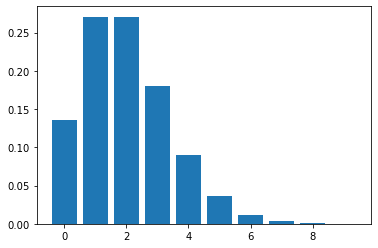

In [7]:
x = np.arange(0, 10)
y = stats.poisson(2).pmf(x)

plt.bar(x,y)

What is the probability that no cars drive up in the noon hour?

In [8]:
stats.poisson(2).pmf(0)

0.1353352832366127

What is the probability that 3 or more cars come through the drive through?

In [9]:
stats.poisson(2).sf(2)

0.32332358381693654

How likely is it that the drive through gets at least 1 car?

In [10]:
stats.poisson(2).sf(0)

0.8646647167633873

## Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [11]:
μ = 3.0
σ = .3

grad_dist = stats.norm(μ, σ)

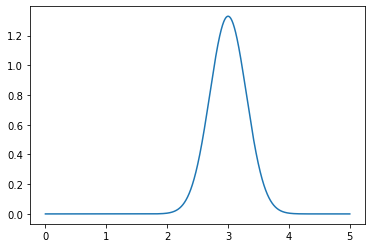

In [12]:
x = np.arange(0, 5, .001)

plt.plot(x, stats.norm.pdf(x, μ, σ))

What grade point average is required to be in the top 5% of the graduating class?

In [13]:
grad_dist.isf(.05)

3.4934560880854417

What GPA constitutes the bottom 15% of the class?

In [14]:
grad_dist.ppf(.15)

2.689069983151863

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [15]:
grad_dist.ppf([.20, .30])

array([2.74751363, 2.84267985])

If I have a GPA of 3.5, what percentile am I in?

In [16]:
grad_dist.cdf(3.5)

0.9522096477271853

A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [17]:
#click through or not --> binomial
#n_trials = visitors
visitors = 4326
#succes rate (prop) = .02
clicks = .02

stats.binom(visitors, clicks).sf(96)

0.13975823631416448

You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question. What is the probability that at least one of your first 60 answers is correct?

In [18]:
#correct or not --> binomial
#trials --> 60 questions --> 60 trials
questions = 60
#success rate --> .01
guess_prob = .01
stats.binom(questions, guess_prob).sf(0)


0.45284335760923855

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

How likely is it that the break area gets cleaned up each day?

In [19]:
#clean or not clean --> binomial
#trials --> .90 * 66 
#success rate --> .03
stats.binom(59.4, .03).sf(0)

0.8362274861228872

How likely is it that it goes two days without getting cleaned up? 

In [20]:
#clean or not clean --> binomial
#trials --> .90 * 66 
#success rate --> .03
stats.binom(118.8, .03).pmf(0)

0.026821436301628997

All week?

In [21]:
#clean or not clean --> binomial
#trials --> .90 * 66 
#success rate --> .03
stats.binom(178.2, .03).pmf(0)

0.0043926140489126235

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [22]:
μ = 15 # --> 15 * 2 = 30 minutes --> + (10 + 2 [for your own order]) = 42 --> whats the number that gets us to 45 --> 16.5 
σ = 3
stats.norm(μ, σ).cdf(16.5)

0.6914624612740131

Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [23]:
from env import host, user, password

In [24]:
emp_url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [28]:
emp_sql = """
SELECT*
FROM employees
JOIN salaries USING (emp_no)
WHERE salaries.to_date > now()
"""

In [29]:
emp_df = pd.read_sql(emp_sql, emp_url)

In [30]:
emp_df = pd.DataFrame(emp_df)

In [32]:
emp_df_copy = emp_df

In [34]:
emp_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


In [36]:
μ = emp_df['salary'].mean()

In [44]:
σ = emp_df['salary'].std()

In [45]:
salary_dist = stats.norm(μ , σ)

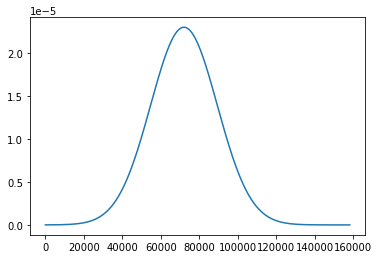

In [51]:
x = np.arange(0, emp_df['salary'].max() + 1)
y = salary_dist.pdf(x)
plt.plot(x,y)

What percent of employees earn less than 60,000?

In [52]:
#with modeling
salary_dist.cdf(59999)

0.2438393099761686

What percent of employees earn more than 95,000?

In [53]:
#with modeling
salary_dist.sf(95_000)

0.09208819199804053

What percent of employees earn between 65,000 and 80,000?

In [56]:
#with modeling
zone = salary_dist.cdf([65_000, 80_000])
zone = zone[1] - zone[0]
zone

0.3350605685446666

What do the top 5% of employees make?

In [58]:
#with modeling
salary_dist.isf(.05)

100484.64454102777